In [15]:
#Some plotting code inspired by https://www.kaggle.com/artgor/eda-feature-engineering-and-everything



#plotting and datahandling imports
# from core.data_processor import DataHandler
from datetime import datetime, timedelta
import numpy as np 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [20]:
#bring in the data
data = DataHandler('../data/market_train_env.pkl', '../data/news_train_env.pkl')
market_train = data.env_market
news_train = data.env_news

In [3]:
#let's look at 10 random assets
def plot_random_assets(market_train_df):
    #pass in the market dataframe and get a price plot for 10 random companies
    data = []
    for asset in np.random.choice(market_train_df['assetName'].unique(), 10):
        asset_df = market_train_df[(market_train_df['assetName'] == asset)]

        data.append(go.Scatter(
            x = asset_df['time'].dt.strftime(date_format = '%Y-%m-%d').values,
            y = asset_df['close'].values,
            name = asset
            ))

    layout = go.Layout(dict(title = 'Close Prices : Random Sample of 10 Assets',
                            yaxis = dict(title = 'Price (USD)'),
                            ), legend=dict(
                            orientation="h"
                            ))
    py.iplot(dict(data=data, layout=layout), filename='basic-line')


In [6]:
plot_random_assets(market_train)

In [9]:
#Now let's look at the whole market
#keep in the mind the quantiles don't factor in stock splits, so it looks like the .95 quantile keeps growing
#while the other stocks are not.

def plot_market_trends(market_train_df):
    data = []
    for i in [0.25, 0.5, 0.75, 0.95]:
        price_df = market_train_df.groupby('time')['close'].quantile(i).reset_index()

        data.append(go.Scatter(
            x = price_df['time'].dt.strftime(date_format='%Y-%m-%d').values,
            y = price_df['close'].values,
            name = f'{i} quantile'
        ))
    layout = go.Layout(dict(title = "Closing Price Trend by Quantile",
                      yaxis = dict(title = 'Price (USD)')
                      ),legend=dict(
                    orientation="h"),
        annotations=[
            dict(
                x='2008-09-01 22:00:00+0000',
                y=82,
                xref='x',
                yref='y',
                text='Collapse of Lehman Brothers',
                showarrow=True,
                font=dict(
                    family='Courier New, monospace',
                    size=16,
                    color='#ffffff'
                ),
                align='center',
                arrowhead=2,
                arrowsize=1,
                arrowwidth=2,
                arrowcolor='#636363',
                ax=20,
                ay=-30,
                bordercolor='#c7c7c7',
                borderwidth=2,
                borderpad=4,
                bgcolor='#ff7f0e',
                opacity=0.8
            ),
            dict(
                x='2011-08-01 22:00:00+0000',
                y=85,
                xref='x',
                yref='y',
                text='Black Monday',
                showarrow=True,
                font=dict(
                    family='Courier New, monospace',
                    size=16,
                    color='#ffffff'
                ),
                align='center',
                arrowhead=2,
                arrowsize=1,
                arrowwidth=2,
                arrowcolor='#636363',
                ax=20,
                ay=-30,
                bordercolor='#c7c7c7',
                borderwidth=2,
                borderpad=4,
                bgcolor='#ff7f0e',
                opacity=0.8
            ),
            dict(
                x='2014-07-01 22:00:00+0000',
                y=120,
                xref='x',
                yref='y',
                text='Start of oil price crash',
                showarrow=True,
                font=dict(
                    family='Courier New, monospace',
                    size=16,
                    color='#ffffff'
                ),
                align='center',
                arrowhead=2,
                arrowsize=1,
                arrowwidth=2,
                arrowcolor='#636363',
                ax=20,
                ay=-30,
                bordercolor='#c7c7c7',
                borderwidth=2,
                borderpad=4,
                bgcolor='#ff7f0e',
                opacity=0.8
            )
        ])
    py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [10]:
plot_market_trends(market_train)

In [29]:
#Going hunting for anomolies in the price action
def plot_price_change_months(market_train_df):
    market_train_df['price_diff'] = market_train_df['close'] - market_train_df['open']
    grouped = market_train_df.groupby('time').agg({'price_diff':['std', 'min']}).reset_index()
    g = grouped.sort_values(('price_diff', 'std'), ascending= False)[:10]
    g['min_text'] = 'Maximum price drop: ' + (-1 * g['price_diff']['min']).astype(str)
    trace = go.Scatter(
            x =g['time'].dt.strftime(date_format='%Y-%m-%d').values,
            y = g['price_diff']['std'].values,
            mode = 'markers',
            marker=dict(
                    size = g['price_diff']['std'].values,
                    color = g['price_diff']['std'].values,
                    colorscale='Portland',
                    showscale=True
            ),
            text =  g['min_text'].values)

    data = [trace]

    layout = go.Layout(
            autosize=True,
            title = 'Top 10 Months by Price Change In One Day',
            hovermode = 'closest',
            yaxis=dict(
                    title='price_diff',
                    ticklen=5,
                    gridwidth=2,
                ),
                showlegend=False)
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='scatter2010')

In [30]:
plot_price_change_months(market_train)

In [48]:
#let's look at some outliers
market_train.sort_values('price_diff', ascending=False)[:10]


time assetCode                         assetName  \
3846636 2016-07-06 22:00:00+00:00    ZNGA.O                         Zynga Inc   
3846276 2016-07-06 22:00:00+00:00    SHLD.O               Sears Holdings Corp   
3845467 2016-07-06 22:00:00+00:00    FLEX.O                          Flex Ltd   
3845835 2016-07-06 22:00:00+00:00     MAT.O                        Mattel Inc   
50031   2007-03-22 22:00:00+00:00     PBR.N  Petroleo Brasileiro SA Petrobras   
3845015 2016-07-06 22:00:00+00:00    BBBY.O             Bed Bath & Beyond Inc   
92477   2007-05-03 22:00:00+00:00    PBRa.N  Petroleo Brasileiro SA Petrobras   
206676  2007-08-23 22:00:00+00:00     EXH.N                      Archrock Inc   
459234  2008-04-24 22:00:00+00:00     EMN.N               Eastman Chemical Co   
3845309 2016-07-06 22:00:00+00:00    DISH.O                 DISH Network Corp   

            volume   close     open  returnsClosePrevRaw1  \
3846636   418847.0  123.47   3.6500             45.592453   
3846276    80940.0  123.47   8.8400              8.512327   
3845467   175451.0  123.45  16.4400              9.587479   
3845835    56994.0  123.45  21.5400              2.904175   
50031    3869540.0   94.57   0.2100              0.013395   
3845015    50303.0  123.45  30.6800              1.921202   
92477    1360303.0   91.20   0.0100              0.010974   
206676    742700.0   76.25   0.0100             -0.025559   
459234    819909.0   69.70   1.7111              0.005772   
3845309    87466.0  123.47  63.2900              1.430033   

         returnsOpenPrevRaw1  returnsClosePrevMktres1  returnsOpenPrevMktres1  \
3846636             0.403846                45.122435                0.401845   
3846276            -0.351431                 8.417827               -0.345786   
3845467             0.405128                 9.482848                0.404713   
3845835            -0.315321                 2.864919               -0.304480   
50031              -0.997675                 0.014126               -0.894734   
3845015            -0.295522                 1.897847               -0.291610   
92477              -0.999888                 0.000216               -0.959594   
206676             -0.999870                -0.024610               -0.982473   
459234             -0.975743                -0.000162               -0.976794   
3845309             0.206903                 1.407708                0.208864   

         returnsClosePrevRaw10  returnsOpenPrevRaw10  \
3846636              46.671815              0.420233   
3846276               7.781650             -0.370819   
3845467               8.503464              0.254962   
3845835               2.842204             -0.334363   
50031                 0.059015             -0.997645   
3845015               1.849065             -0.303044   
92477                -0.002952             -0.999890   
206676                0.004057             -0.999869   
459234               -0.004001             -0.975408   
3845309               1.325673              0.187207   

         returnsClosePrevMktres10  returnsOpenPrevMktres10  \
3846636                 46.249715                 0.420887   
3846276                  7.710716                -0.370630   
3845467                  8.425788                 0.255200   
3845835                  2.812233                -0.334071   
50031                    0.018241                -0.922537   
3845015                  1.826249                -0.302549   
92477                    0.008826                -1.019173   
206676                  -0.011510                -0.973421   
459234                   0.006707                -0.959450   
3845309                  1.295536                 0.188725   

         returnsOpenNextMktres10  universe  price_diff  
3846636                -0.045244       0.0    119.8200  
3846276                 0.059298       0.0    114.6300  
3845467                 0.087592       1.0    107.0100  
3845835                -0.069237       1.0   

In [43]:
#look at how the market feed handled stock splits before writing cleaning script
appledf = market_train[market_train.assetName == 'Apple Inc']

appledf[(appledf.time > '2014-06-01') & (appledf.time < '2014-06-14')].loc[:, ['time', 'assetName', 'close', 'open', 'returnsOpenNextMktres10', 'price_diff']]

time  assetName   close    open  \
2947191 2014-06-02 22:00:00+00:00  Apple Inc  628.65  634.00   
2948850 2014-06-03 22:00:00+00:00  Apple Inc  637.54  628.47   
2950509 2014-06-04 22:00:00+00:00  Apple Inc  644.82  637.28   
2952165 2014-06-05 22:00:00+00:00  Apple Inc  647.35  646.25   
2953823 2014-06-06 22:00:00+00:00  Apple Inc  645.57  650.00   
2955476 2014-06-09 22:00:00+00:00  Apple Inc   93.70   92.70   
2957132 2014-06-10 22:00:00+00:00  Apple Inc   94.25   94.64   
2958788 2014-06-11 22:00:00+00:00  Apple Inc   93.86   94.13   
2960442 2014-06-12 22:00:00+00:00  Apple Inc   92.29   94.04   
2962076 2014-06-13 22:00:00+00:00  Apple Inc   91.28   92.18   

         returnsOpenNextMktres10  price_diff  
2947191                 0.015568       -5.35  
2948850                -0.006355        9.07  
2950509                -0.028834        7.54  
2952165                -0.029203        1.10  
2953823                -0.031595       -4.43  
2955476                -0.057607        1.00  
2957132                -0.041060       -0.39  
2958788                -0.068149       -0.27  
2960442                -0.065490       -1.75  
2962076                -0.044774       -0.90

In [55]:
outliers = market_train.sort_values('price_diff', ascending=True)[:10]

In [56]:
outliers = outliers.append(market_train.sort_values('price_diff', ascending=False)[:10])

In [60]:
def replace_outliers(df):
    df['dailychange'] = df['close']/df['open']
    df['open'][df['dailychange'] < .5] = df['close']
    df['close'][df['dailychange'] > 2] = df['open']
    return df

In [61]:
outliers_new = replace_outliers(outliers)

In [64]:
market_train = replace_outliers(market_train)

In [65]:
plot_price_change_months(market_train)

market_train.info()

In [70]:
market_train.describe()

volume         close          open  returnsClosePrevRaw1  \
count  4.072956e+06  4.072956e+06  4.072956e+06          4.072956e+06   
mean   2.665312e+06  3.971198e+01  3.970828e+01          5.473026e-04   
std    7.687606e+06  4.228818e+01  4.228560e+01          3.697774e-02   
min    0.000000e+00  1.000000e-02  1.000000e-02         -9.776464e-01   
25%    4.657968e+05  1.725000e+01  1.725000e+01         -1.089241e-02   
50%    9.821000e+05  3.030000e+01  3.029000e+01          3.373819e-04   
75%    2.403165e+06  4.986000e+01  4.985000e+01          1.165695e-02   
max    1.226791e+09  1.578130e+03  1.584440e+03          4.559245e+01   

       returnsOpenPrevRaw1  returnsClosePrevMktres1  returnsOpenPrevMktres1  \
count         4.072956e+06             4.056976e+06            4.056968e+06   
mean          9.569113e-03             1.738580e-04            9.309293e-03   
std           7.084388e+00             3.270305e-02            6.968866e+00   
min          -9.998881e-01            -1.235622e+00           -6.158463e+02   
25%          -1.108987e-02            -8.569246e-03           -1.002114e-02   
50%           3.824092e-04            -1.236127e-04           -3.356938e-06   
75%           1.183612e-02             8.397528e-03            1.002712e-02   
max           9.209000e+03             4.512244e+01            8.989207e+03   

       returnsClosePrevRaw10  returnsOpenPrevRaw10  returnsClosePrevMktres10  \
count           4.072956e+06          4.072956e+06              3.979946e+06   
mean            5.232021e-03          1.423685e-02              1.638857e-03   
std             8.872484e-02          7.123552e+00              7.517820e-02   
min            -9.774034e-01         -9.998904e-01             -3.343277e+00   
25%            -3.339148e-02         -3.337574e-02             -2.927584e-02   
50%             5.160339e-03          5.165128e-03              8.329261e-04   
75%             4.297606e-02          4.298507e-02              3.059022e-02   
max             4.667181e+01          9.382000e+03              4.624971e+01   

       returnsOpenPrevMktres10  returnsOpenNextMktres10      universe  \
count             3.979902e+06             4.072956e+06  4.072956e+06   
mean              1.481702e-02             1.405528e-02  5.949365e-01   
std               7.285742e+00             7.242467e+00  4.909044e-01   
min              -1.375045e+03            -1.375045e+03  0.000000e+00   
25%              -2.962645e-02            -2.970509e-02  0.000000e+00   
50%               1.126206e-03             1.044642e-03  1.000000e+00   
75%               3.171535e-02             3.152750e-02  1.000000e+00   
max               9.761338e+03             9.761338e+03  1.000000e+00   

         price_diff   dailychange  
count  4.072956e+06  4.072956e+06  
mean   3.704498e-03  1.009127e+00  
std    9.980771e-01  7.052655e+00  
min   -9.824000e+01  5.000505e-03  
25%   -2.800000e-01  9.900964e-01  
50%    0.000000e+00  1.000000e+00  
75%    2.900000e-01  1.010146e+00  
max    6.018000e+01  9.120000e+03

In [195]:
#Let's look at the target variable
def plot_target(market_train_df):
    data = []
    for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]:
        price_df = market_train_df.groupby('time')['returnsOpenNextMktres10'].quantile(i).reset_index()

        data.append(go.Scatter(
            x = price_df['time'].dt.strftime(date_format='%Y-%m-%d').values,
            y = price_df['returnsOpenNextMktres10'].values,
            name = f'{i} quantile'
        ))
    layout = go.Layout(dict(title = "Target Variable: returnsOpenNextMktres10 by quantiles",
                      yaxis = dict(title = '% Percent Return Next 10 Days'),
                      ),legend=dict(
                    orientation="h"),)
    py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [196]:
plot_target(market_train)

In [212]:
labels = ['Positive', 'Negative']

data = []
data.append(go.Pie(values=values, labels=labels))

layout = go.Layout(dict(title = "Target Variable % Breakdown"))

py.iplot(dict(data=data, layout=layout), filename='donut')

In [ ]:
#at least one of the spikes in target variable checks out
market_train.loc[(market_train['assetCode'] == 'GTI.N') & (market_train['time'] <= '2007-06-01 22:00:00+0000') & (market_train['time'] >= '2007-05-01 22:00:00+0000')]

In [176]:
#lets look at all where the return is higher than 1.5% 
market_train[(market_train['returnsOpenNextMktres10'] > 1.5) &  (market_train['universe'] == 1)]

time assetCode                         assetName  \
47589   2007-03-21 22:00:00+00:00     ADI.N                Analog Devices Inc   
47603   2007-03-21 22:00:00+00:00     AET.N                         Aetna Inc   
48072   2007-03-21 22:00:00+00:00     FDC.N                   First Data Corp   
48390   2007-03-21 22:00:00+00:00     MAS.N                        Masco Corp   
48575   2007-03-21 22:00:00+00:00     PBR.N  Petroleo Brasileiro SA Petrobras   
48869   2007-03-21 22:00:00+00:00     TOL.N                 Toll Brothers Inc   
48916   2007-03-21 22:00:00+00:00     UNH.N            UnitedHealth Group Inc   
51490   2007-03-23 22:00:00+00:00     PBR.N  Petroleo Brasileiro SA Petrobras   
51965   2007-03-26 22:00:00+00:00     ADI.N                Analog Devices Inc   
51979   2007-03-26 22:00:00+00:00     AET.N                         Aetna Inc   
52449   2007-03-26 22:00:00+00:00     FDC.N                   First Data Corp   
52957   2007-03-26 22:00:00+00:00     PBR.N  Petroleo Brasileiro SA Petrobras   
53302   2007-03-26 22:00:00+00:00     UNH.N            UnitedHealth Group Inc   
53434   2007-03-27 22:00:00+00:00     ADI.N                Analog Devices Inc   
53448   2007-03-27 22:00:00+00:00     AET.N                         Aetna Inc   
53917   2007-03-27 22:00:00+00:00     FDC.N                   First Data Corp   
54239   2007-03-27 22:00:00+00:00     MAS.N                        Masco Corp   
54426   2007-03-27 22:00:00+00:00     PBR.N  Petroleo Brasileiro SA Petrobras   
54726   2007-03-27 22:00:00+00:00     TOL.N                 Toll Brothers Inc   
54773   2007-03-27 22:00:00+00:00     UNH.N            UnitedHealth Group Inc   
54904   2007-03-28 22:00:00+00:00     ADI.N                Analog Devices Inc   
54917   2007-03-28 22:00:00+00:00     AES.N                          AES Corp   
54918   2007-03-28 22:00:00+00:00     AET.N                         Aetna Inc   
55388   2007-03-28 22:00:00+00:00     FDC.N                   First Data Corp   
55709   2007-03-28 22:00:00+00:00     MAS.N                        Masco Corp   
55896   2007-03-28 22:00:00+00:00     PBR.N  Petroleo Brasileiro SA Petrobras   
56195   2007-03-28 22:00:00+00:00     TOL.N                 Toll Brothers Inc   
56242   2007-03-28 22:00:00+00:00     UNH.N            UnitedHealth Group Inc   
56374   2007-03-29 22:00:00+00:00     ADI.N                Analog Devices Inc   
56388   2007-03-29 22:00:00+00:00     AET.N                         Aetna Inc   
...                           ...       ...                               ...   
2802311 2014-01-23 22:00:00+00:00    ICPT.O     Intercept Pharmaceuticals Inc   
3163762 2014-12-16 22:00:00+00:00    RFMD.O              RF Micro Devices Inc   
3165413 2014-12-17 22:00:00+00:00    RFMD.O              RF Micro Devices Inc   
3167069 2014-12-18 22:00:00+00:00    RFMD.O              RF Micro Devices Inc   
3168731 2014-12-19 22:00:00+00:00    RFMD.O              RF Micro Devices Inc   
3170393 2014-12-22 22:00:00+00:00    RFMD.O              RF Micro Devices Inc   
3172056 2014-12-23 22:00:00+00:00    RFMD.O              RF Micro Devices Inc   
3173718 2014-12-24 22:00:00+00:00    RFMD.O              RF Micro Devices Inc   
3175373 2014-12-26 22:00:00+00:00    RFMD.O              RF Micro Devices Inc   
3177028 2014-12-29 22:00:00+00:00    RFMD.O              RF Micro Devices Inc   
3178687 2014-12-30 22:00:00+00:00    RFMD.O              RF Micro Devices Inc   
3822310 2016-06-16 22:00:00+00:00     HTZ.N         Hertz Global Holdings Inc   
3824106 2016-06-17 22:00:00+00:00     HTZ.N         Hertz Global Holdings Inc   
3825901 2016-06-20 22:00:00+00:00     HTZ.N         Hertz Global Holdings Inc   
3827697 2016-06-21 22:00:00+00:00     HTZ.N         Hertz Global Holdings Inc   
3829493 2016-06-22 22:00:00+00:00     HTZ.N         Hertz Global Holdings Inc   
3831287 2016-06-23 22:00:00+00:00     HTZ.N         Hertz Global Holdings Inc   
3952190 2016-09-28 22:00:00+00:00  EBRYY.OB                 

In [179]:
#how about how many are going to be tracked in the prediction?
market_train[market_train['universe']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2423150 entries, 0 to 4072955
Data columns (total 18 columns):
time                        datetime64[ns, UTC]
assetCode                   object
assetName                   category
volume                      float64
close                       float64
open                        float64
returnsClosePrevRaw1        float64
returnsOpenPrevRaw1         float64
returnsClosePrevMktres1     float64
returnsOpenPrevMktres1      float64
returnsClosePrevRaw10       float64
returnsOpenPrevRaw10        float64
returnsClosePrevMktres10    float64
returnsOpenPrevMktres10     float64
returnsOpenNextMktres10     float64
universe                    float64
price_diff                  float64
dailychange                 float64
dtypes: category(1), datetime64[ns, UTC](1), float64(15), object(1)
memory usage: 337.6+ MB


In [150]:
print(f'There are {len(market_train.assetCode.unique())} companies in the training set')

There are 3780 companies in the training set


In [162]:
print(f"""We are not interested in tracking {np.sum(market_train.pivot_table(index='assetCode', values='universe').sort_values('universe')==0).values} of them""")

We are not interested in tracking [1314] of them


In [164]:
#I may want to delete the non-tracked companies. Here is how I would make a mask
market_train.pivot_table(index='assetCode', values='universe').sort_values('universe')==0

universe
assetCode          
ZZ.N            0.0
ISYS.O          0.0
ISPH.O          0.0
ISLE.O          0.0
ISCA.O          0.0
IRWD.O          0.0
IRS.N           0.0
IRET.O          0.0
IRET.N          0.0
IRDM.O          0.0
IRBT.O          0.0
TYL.N           0.0
IPHS.O          0.0
IPHI.N          0.0
TYPE.O          0.0
IPCM.O          0.0
TZIX.O          0.0
IOSP.O          0.0
INWK.O          0.0
INVN.N          0.0
INVA.O          0.0
INTL.O          0.0
INSM.O          0.0
INOV.O          0.0
INO.O           0.0
INN.N           0.0
ITCI.O          0.0
ININ.O          0.0
ITGR.N          0.0
ITWO.O          0.0
...             ...
LNG.A           1.0
LTD.N           1.0
LNC.N           1.0
LMDIA.O         1.0
LM.N            1.0
LLY.N           1.0
LLTC.O          1.0
LKQ.O           1.0
LGFb.N          1.0
LMT.N           1.0
LTR.N           1.0
LUV.N           1.0
LVLT.N          1.0
MCK.N           1.0
MCHP.O          1.0
MCD.N           1.0
MBT.N           1.0
MAT.O           1.0
MAT.N           1.0
MAS.N           1.0
MAR.O           1.0
MAR.N           1.0
M.N             1.0
LYO.N           1.0
LYB.N           1.0
LW.N            1.0
LVS.N           1.0
LVNTA.O         1.0
SU.N            1.0
KO.N            1.0

[3780 rows x 1 columns]

In [ ]:
#Let's look at the news

In [224]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josephshull/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [225]:
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
stop = set(stopwords.words('english'))#Let's look at the News Data now

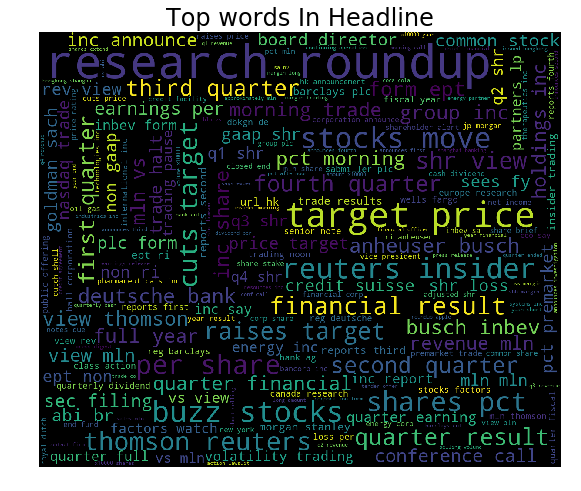

In [228]:
import matplotlib.pyplot as plt
text = ' '.join(news_train['headline'].str.lower().values[-1000000:])
wordcloud = WordCloud(max_font_size=None, stopwords=stop, background_color='black',
                      width=1200, height=1000).generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.title('Top words In Headline', fontsize=24)
plt.axis("off")
plt.show()

KeyboardInterrupt: 

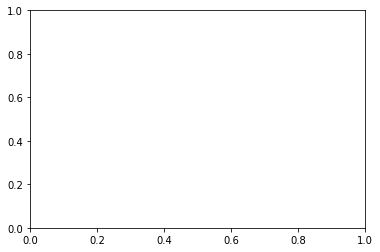

In [235]:
news_train['sentenceCount'].plot.kde()

In [244]:
#How to merge? On assetName
market_train[market_train.assetName=='Merrill Lynch & Co Inc']

time assetCode               assetName  \
825    2007-02-01 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
2244   2007-02-02 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
3669   2007-02-05 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
5100   2007-02-06 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
6531   2007-02-07 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
7959   2007-02-08 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
9389   2007-02-09 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
10823  2007-02-12 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
12256  2007-02-13 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
13688  2007-02-14 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
15121  2007-02-15 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
16552  2007-02-16 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
17984  2007-02-20 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
19417  2007-02-21 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
20851  2007-02-22 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
22281  2007-02-23 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
23717  2007-02-26 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
25155  2007-02-27 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
26597  2007-02-28 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
28039  2007-03-01 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
29482  2007-03-02 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
30926  2007-03-05 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
32371  2007-03-06 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
33817  2007-03-07 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
35268  2007-03-08 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
36724  2007-03-09 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
38180  2007-03-12 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
39643  2007-03-13 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
41109  2007-03-14 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
42575  2007-03-15 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
...                          ...       ...                     ...   
668216 2008-11-03 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
669819 2008-11-04 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
671423 2008-11-05 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
673027 2008-11-06 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
674633 2008-11-07 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
676236 2008-11-10 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
677838 2008-11-11 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
679439 2008-11-12 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
681038 2008-11-13 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
682635 2008-11-14 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
684232 2008-11-17 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
685827 2008-11-18 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
687422 2008-11-19 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
689016 2008-11-20 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
690605 2008-11-21 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
692201 2008-11-24 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
693797 2008-11-25 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
695392 2008-11-26 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
696986 2008-11-28 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
698585 2008-12-01 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
700189 2008-12-02 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
701794 2008-12-03 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
703398 2008-12-04 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
704999 2008-12-05 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
706598 2008-12-08 22:00:00+00:00     MER.N  Merrill Lynch & Co Inc   
708199 2008-12-09 22:00:00+00:00     M

In [252]:
for i, j in zip([-1, 0, 1], ['negative', 'neutral', 'positive']):
    df_sentiment = news_train.loc[news_train['sentimentClass'] == i, 'assetName']
    print(f'Top mentioned companies for {j} sentiment are:')
    print(df_sentiment.value_counts().head(5))
    print('')

Top mentioned companies for negative sentiment are:
Citigroup Inc              30823
JPMorgan Chase & Co        29129
Bank of America Corp       28197
Apple Inc                  26702
Goldman Sachs Group Inc    25044
Name: assetName, dtype: int64

Top mentioned companies for neutral sentiment are:
Barclays PLC         24898
HSBC Holdings PLC    23191
Deutsche Bank AG     20702
BHP Billiton PLC     18019
Rio Tinto PLC        16782
Name: assetName, dtype: int64

Top mentioned companies for positive sentiment are:
Barclays PLC             22855
Apple Inc                22770
General Electric Co      20055
Royal Dutch Shell PLC    18206
Citigroup Inc            18025
Name: assetName, dtype: int64



In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

def scalethis(data):
    scaler = StandardScaler()
    return scaler.fit_transform(data)

def PCA_this(data):
    pca = PCA()
    pca.fit(data)
    return pca

def plot_2d(pca_object, data, ax):
    reduced = pca_object.fit_transform(data)
    exp_var = np.sum(pca_object.explained_variance_ratio_[:2])
    X1 = reduced[:,0]
    X2 = reduced[:,1]
    ax.scatter(X1, X2, label=f'{exp_var} Variance Explained')
    ax.set_xlabel('Principal Component 1')
    ax.set_xlim(-100,100)
    ax.set_ylabel('Principal Component 2')
    ax.set_ylim(-100,100)
    ax.set_title('PCA for all stocks (mean)')
    ax.legend()


TypeError: zip argument #3 must support iteration

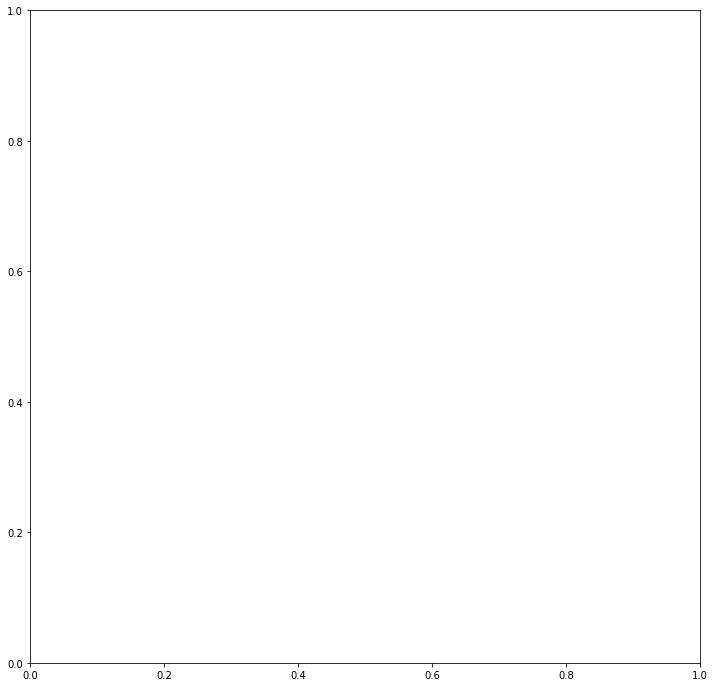

In [11]:
import pandas as pd
df = pd.read_pickle('../data/init_train_data.pkl')
agg = df.groupby('assetName').agg(np.mean)
labels = agg.index.values
agg.drop(columns=['time', 'close', 'open', 'universe'], inplace=True)
scaled = scalethis(agg)
pca = PCA_this(agg)


# fig, ax = plt.subplots(figsize=(12,12))
# plot_2d(pca, agg, ax)
# plt.show()

In [25]:
def plot_2d(pca_object, data, labels):
    reduced = pca_object.fit_transform(data)
    exp_var = np.sum(pca_object.explained_variance_ratio_[:2])
    X1 = reduced[:,0].astype(float)
    X2 = reduced[:,1].astype(float)
    l = []
    l.append(go.Scatter(
        x = X1,
        y = X2,
        mode = 'markers',
        text = labels))

    layout = go.Layout(
        title = 'PCA for All Stocks (Mean Values), 59% Variance Explained',
        hovermode = 'closest',
        xaxis=dict(
                title = 'PC #1'),
        yaxis=dict(
            title = 'PC #2',), 
        showlegend=False)
    fig = go.Figure(data=l, layout=layout)
    py.iplot(fig)


SyntaxError: invalid syntax (<ipython-input-25-41d1df091f72>, line 13)

In [24]:
agg = df.groupby('assetName').agg(np.mean)
labels = agg.index.values
plot_2d(pca, scaled, labels)

ValueError: 
    Invalid value of type 'numpy.float64' received for the 'x' property of scatter
        Received value: -0.4977531095944358

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

array(['21Vianet Group Inc', '2U Inc', '3Com Corp', ..., 'rue21 Inc',
       'thinkorswim Group Inc', 'tw telecom Inc'], dtype=object)